In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
titanic_data = pd.read_csv('train.csv')

In [52]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
mode_age = titanic_data['Age'].mode()[0]
print(mode_age)
titanic_data_Null_Fill = titanic_data.fillna({'Age':mode_age})

24.0


In [54]:
titanic_data_Null_Fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
titanic_data_Null_Fill.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


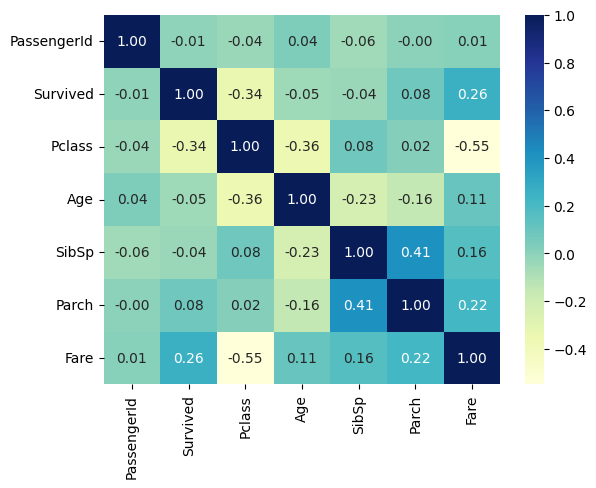

In [56]:
# import seaborn for plotting
import seaborn as sns

# select the numerical columns from the dataset
numerical_value = titanic_data_Null_Fill.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix of the numerical columns
corr_matrix = numerical_value.corr()

# plot the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()

feature_array = encoder.fit_transform(titanic_data_Null_Fill[["Sex","Embarked"]]).toarray()
feature_labels = ['female','male','C','Q','S','N']


In [58]:
df = pd.DataFrame(feature_array,columns=[feature_labels])
df = df.drop(columns=['N'])

C:\Users\prith\AppData\Local\Temp\ipykernel_15992\3321947332.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=['N'])


In [59]:
#df = pd.DataFrame(freture_array,columns=[feature_labels])
titanic_data_Null_Fill = pd.concat([titanic_data_Null_Fill,df],axis=1)

In [60]:
titanic_data_Null_Fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,"(female,)","(male,)","(C,)","(Q,)","(S,)"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,1.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,0.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,1.0,0.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0,1.0,1.0,0.0,0.0


In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

#Initialize StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
#Split the dataset into train and dev sets
for train_index, dev_index in stratified_splitter.split(titanic_data_Null_Fill,titanic_data_Null_Fill[["Survived","Pclass","Sex"]]):
    train_set = titanic_data_Null_Fill.loc[train_index]
    dev_set= titanic_data_Null_Fill.loc[dev_index]


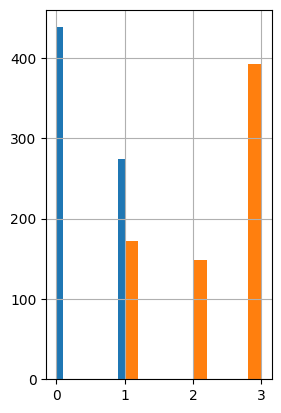

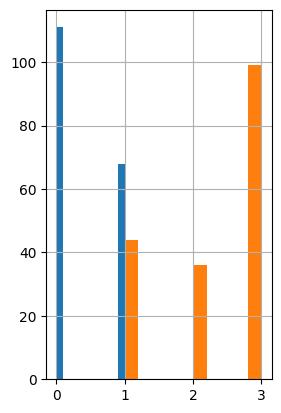

In [62]:
plt.subplot(1,2,1)
train_set["Survived"].hist()
train_set["Pclass"].hist()
plt.show()

plt.subplot(1,2,1)
dev_set["Survived"].hist()
dev_set["Pclass"].hist()

plt.show()


In [63]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 815 to 859
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        169 non-null    object 
 11  Embarked     710 non-null    object 
 12  (female,)    712 non-null    float64
 13  (male,)      712 non-null    float64
 14  (C,)         712 non-null    float64
 15  (Q,)         712 non-null    float64
 16  (S,)         712 non-null    float64
dtypes: float64(7), int64(5), object(5)
memory usage: 100.1+ KB


In [64]:
dev_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 186 to 399
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          179 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        35 non-null     object 
 11  Embarked     179 non-null    object 
 12  (female,)    179 non-null    float64
 13  (male,)      179 non-null    float64
 14  (C,)         179 non-null    float64
 15  (Q,)         179 non-null    float64
 16  (S,)         179 non-null    float64
dtypes: float64(7), int64(5), object(5)
memory usage: 25.2+ KB


In [65]:
train_set.drop(columns=['PassengerId','Sex','Embarked','Name','Ticket','Cabin'], inplace=True,axis=1,errors="ignore")

In [66]:
dev_set.drop(columns=['PassengerId','Sex','Embarked','Name','Ticket','Cabin'], inplace=True,axis=1,errors="ignore")

In [67]:
train_set

,Survived,Pclass,Age,SibSp,Parch,Fare,"(female,)","(male,)","(C,)","(Q,)","(S,)"
815,0,1,24.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
72,0,2,21.0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
82,1,3,24.0,0,0,7.7875,1.0,0.0,0.0,1.0,0.0
177,0,1,50.0,0,0,28.7125,1.0,0.0,1.0,0.0,0.0
415,0,3,24.0,0,0,8.0500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
287,0,3,22.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
631,0,3,51.0,0,0,7.0542,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
753,0,3,23.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0


In [68]:
dev_set 

,Survived,Pclass,Age,SibSp,Parch,Fare,"(female,)","(male,)","(C,)","(Q,)","(S,)"
186,1,3,24.0,1,0,15.5000,1.0,0.0,0.0,1.0,0.0
810,0,3,26.0,0,0,7.8875,0.0,1.0,0.0,0.0,1.0
454,0,3,24.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
166,1,1,24.0,0,1,55.0000,1.0,0.0,0.0,0.0,1.0
361,0,2,29.0,1,0,27.7208,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
398,0,2,23.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
513,1,1,54.0,1,0,59.4000,1.0,0.0,1.0,0.0,0.0
646,0,3,19.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
260,0,3,24.0,0,0,7.7500,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

x= train_set.drop(['Survived'],axis=1)
y=train_set['Survived']

scaler = StandardScaler()

x.columns = x.columns.astype(str)
X_data = scaler.fit_transform(x)
Y_data = y.to_numpy()

In [70]:
x_dev= dev_set.drop(['Survived'],axis=1)
y_dev=dev_set['Survived']

scaler = StandardScaler()

x_dev.columns = x_dev.columns.astype(str)
X_dev_data = scaler.fit_transform(x_dev)
Y_dev_data = y_dev.to_numpy()

In [4]:
test_set = pd.read_csv('test.csv')

In [73]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
mode_age = test_set['Age'].mode()[0]
print(mode_age)
test_data_Null_Fill = test_set.fillna({'Age':mode_age})

21.0


In [75]:
test_data_Null_Fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
encoder = OneHotEncoder()
feature_array = encoder.fit_transform(test_data_Null_Fill[["Sex","Embarked"]]).toarray()

In [80]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [81]:
feature_labels = ['female','male','C','Q','S']

In [82]:
df = pd.DataFrame(feature_array,columns=feature_labels)

In [84]:
final_test = pd.concat([test_data_Null_Fill,df],axis=1)

In [85]:
final_test.drop(columns=['PassengerId','Sex','Embarked','Name','Ticket','Cabin'], inplace=True,axis=1,errors="ignore")

In [86]:
final_test

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,21.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,3,21.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [87]:
scaler = StandardScaler()

final_test.columns = final_test.columns.astype(str)
X_test_data = scaler.fit_transform(final_test)


In [90]:
# X_data.to_csv('X_data.csv', index=False)
# Y_data.to_csv('Y_data.csv', index=False)
# X_dev_data.to_csv('X_dev_data.csv', index=False)
# Y_dev_data.to_csv('Y_dev_data.csv', index=False)
# X_test_data.to_csv('X_test_data.csv', index=False)

np.savetxt('X_data.csv', X_data, delimiter=',', fmt='%s')
np.savetxt('Y_data.csv', Y_data, delimiter=',', fmt='%s')
np.savetxt('X_dev_data.csv', X_dev_data, delimiter=',', fmt='%s')
np.savetxt('Y_dev_data.csv', Y_dev_data, delimiter=',', fmt='%s')
np.savetxt('X_test_data.csv', X_test_data, delimiter=',', fmt='%s')

In [7]:
output = pd.read_csv('Output.csv')

In [5]:
x = test_set['PassengerId']

In [6]:
x

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [10]:
pd.concat([x,output],axis=1).to_csv('Final_Output.csv', index=False)